In [108]:
#import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

rel_path = 'BoxData_All_SDs.json'

data_file = open(rel_path)

data = json.load(data_file)

In [109]:
df = json_normalize(data)
cols = [col for col in df.columns if 'Fitted' in col]
df2 = df[cols]

In [110]:
df.head(3)

,Angles Directions.AngleBackEdgesBottomEast.Angle,Angles Directions.AngleBackEdgesEastTop.Angle,Angles Directions.AngleBackEdgesTopWest.Angle,Angles Directions.AngleBackEdgesWestBottom.Angle,Angles Directions.AngleBottomEdgesBackWest.Angle,Angles Directions.AngleBottomEdgesEastBack.Angle,Angles Directions.AngleBottomEdgesFrontLPEast.Angle,Angles Directions.AngleBottomEdgesWestFrontLP.Angle,Angles Directions.AngleEastEdgesBackBottom.Angle,Angles Directions.AngleEastEdgesBottomFrontLP.Angle,...,Intersection Points.IntersectionPointPlanesWestFrontLPFrontUP.IntersectionPoint: x,Intersection Points.IntersectionPointPlanesWestFrontLPFrontUP.IntersectionPoint: y,Intersection Points.IntersectionPointPlanesWestFrontLPFrontUP.IntersectionPoint: z,Intersection Points.IntersectionPointPlanesWestFrontUPTop.IntersectionPoint: x,Intersection Points.IntersectionPointPlanesWestFrontUPTop.IntersectionPoint: y,Intersection Points.IntersectionPointPlanesWestFrontUPTop.IntersectionPoint: z,Intersection Points.IntersectionPointPlanesWestTopBack.IntersectionPoint: x,Intersection Points.IntersectionPointPlanesWestTopBack.IntersectionPoint: y,Intersection Points.IntersectionPointPlanesWestTopBack.IntersectionPoint: z,ObjID
0,90.3943,89.8005,90.2132,89.592,90.1372,90.8041,86.1754,92.8834,90.1752,57.0022,...,-87.2942,48.7899,-28.5596,-79.1351,154.605,98.3549,-80.0162,195.788,-65.8661,127Frag
1,empty,89.4767,87.9491,empty,empty,empty,empty,empty,empty,empty,...,-112.315,-169.705,-185.431,-299.684,13.6659,1.6254,36.0702,-87.9215,57.1083,128
2,empty,empty,empty,empty,empty,empty,empty,empty,empty,empty,...,empty,empty,empty,empty,empty,empty,empty,empty,empty,46


In [111]:
df3 = df2.replace(['empty'],[None])

In [112]:
df3.columns = df3.columns.str.replace('Fitted Planes.Plane','')
#df3.astype(float)
df4 = df3.convert_objects(convert_numeric=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [113]:
df4.head(3)

,Back.HNF: d,Back.HNF: n1,Back.HNF: n2,Back.HNF: n3,Back.Orientation,Bottom.HNF: d,Bottom.HNF: n1,Bottom.HNF: n2,Bottom.HNF: n3,Bottom.Orientation,...,Top.HNF: d,Top.HNF: n1,Top.HNF: n2,Top.HNF: n3,Top.Orientation,West.HNF: d,West.HNF: n1,West.HNF: n2,West.HNF: n3,West.Orientation
0,110.803,-0.008022,0.235730,-0.971785,1.0,26.2675,-0.050095,-0.969944,-0.238117,1.0,...,169.38500,0.053527,0.968642,0.242625,1.0,89.2549,-0.998348,0.054241,0.018959,1.0
1,66.084,0.952624,-0.270573,0.138919,1.0,NaN,NaN,NaN,NaN,NaN,...,2.68271,0.019762,0.528756,0.848544,1.0,87.2447,-0.325823,-0.817454,0.474983,1.0
2,214.988,-0.020724,0.156790,-0.987415,1.0,73.9878,0.029962,-0.986276,-0.162363,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def varDictI(k):
    varDict = {}
    #len(df3.loc[0])
    for i in [0,5,10,15,20,25,30]:
        varDict['{0}{1}'.format(df4.loc[k].keys()[i].split('.')[0],0)] = [df4.loc[k][i],df4.loc[k][i+1],df4.loc[k][i+2],df4.loc[k][i+3],df4.loc[k][i+4]]
    return varDict

In [99]:
iList = []
for i in range(len(df4)):
    if np.isnan([item for sublist in varDictI(i).values() for item in sublist]).any():
        iList.append(i)
        
iposList = []
for i in range(len(df4)):
    if not np.isnan([item for sublist in varDictI(i).values() for item in sublist]).any():
        iposList.append(i)

<IPython.core.display.Javascript object>


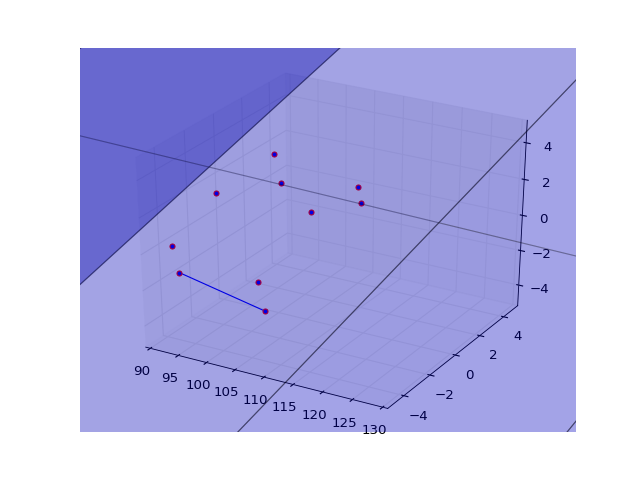

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sympy import Point, Point3D, Line, Line3D, Plane


%matplotlib notebook

X = np.linspace(-200, 200, 100)            
Y = np.linspace(-200, 200, 100)
xx, yy = np.meshgrid(X,Y)

#Define sets of Hesse normal form data for each site. 
i=0

if i in iList:
    raise ValueError('Coordinate list for i = %s contains nan Values.' % i)

nBa = varDictI(i)['Back0']
nBo = varDictI(i)['Bottom0']
nTo = varDictI(i)['Top0']
nE  = varDictI(i)['East0']
nW  = varDictI(i)['West0']
nFL = varDictI(i)['FrontLP0']
nFU = varDictI(i)['FrontUP0']

    
# Find all z coordinates, that fullfill Hesse normal form
zBa =  (-nBa[1]  * xx - nBa[2]  * yy - nBa[0]/100) * 1. / nBa[3]
zBo =  (-nBo[1]  * xx - nBo[2]  * yy - nBo[0]/100) * 1. / nBo[3]
zTo  = (-nTo[1]  * xx - nTo[2]  * yy - nTo[0]/100) * 1. / nTo[3]
zE  =  (- nE[1]  * xx -  nE[2]  * yy -  nE[0]/100) * 1. / nE[3]
zW  =  (- nW[1]  * xx -  nW[2]  * yy -  nW[0]/100) * 1. / nW[3]

#Test norm?! 

#Define planes in sympy using given Hesse normal form
ba = Plane(Point3D(nBa[0], 0, 0), normal_vector=(nBa[1], nBa[2], nBa[3]))
to = Plane(Point3D(nTo[0], 0, 0), normal_vector=(nTo[1], nTo[2], nTo[3]))
bo = Plane(Point3D(nBo[0], 0, 0), normal_vector=(nBo[1], nBo[2], nBo[3]))
we = Plane(Point3D(nW[0], 0, 0), normal_vector=(nW[1], nW[2], nW[3]))
ea = Plane(Point3D(nE[0], 0, 0), normal_vector=(nE[1], nE[2], nE[3]))
flp = Plane(Point3D(nFL[0],0, 0), normal_vector=(nFL[1], nFL[2], nFL[3]))
fup = Plane(Point3D(nFU[0],0, 0), normal_vector=(nFU[1], nFU[2], nFU[3]))

#Calculate intersections of three planes, gives points of corners in 3D
x1 = flp.intersection(bo)[0].intersection(we)[0]
x2 = fup.intersection(to)[0].intersection(we)[0]
x3 = fup.intersection(to)[0].intersection(ea)[0]
x4 = flp.intersection(bo)[0].intersection(ea)[0]
x5 = ba.intersection(to)[0].intersection(we)[0]
x6 = ba.intersection(to)[0].intersection(ea)[0]
x7 = ba.intersection(bo)[0].intersection(ea)[0]
x8 = ba.intersection(bo)[0].intersection(we)[0]
x9 = flp.intersection(fup)[0].intersection(we)[0]
x10 = flp.intersection(fup)[0].intersection(ea)[0]

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# plot the surface
ax.plot_surface(xx, yy, zBa,alpha=0.2)
#ax.plot_surface(xx, yy, zBo,alpha=0.2)
#ax.plot_surface(xx, yy, zTo,alpha=0.2)
#ax.plot_surface(xx, yy, zE,cmap=cm.BuPu,alpha=0.2)
#ax.plot_surface(xx, yy, zW,cmap=cm.BuPu,alpha=0.2)

#Points are given as tuples of sympy objects, thus .args[i]
ax.scatter(x1.args[0], x1.args[1], x1.args[2],  color='red')
ax.scatter(x2.args[0], x2.args[1], x2.args[2],  color='red')
ax.scatter(x3.args[0], x3.args[1], x3.args[2],  color='red')
ax.scatter(x4.args[0], x4.args[1], x4.args[2],  color='red')
ax.scatter(x5.args[0], x5.args[1], x5.args[2],  color='red')
ax.scatter(x6.args[0], x6.args[1], x6.args[2],  color='red')
ax.scatter(x7.args[0], x7.args[1], x7.args[2],  color='red')
ax.scatter(x8.args[0], x8.args[1], x8.args[2],  color='red')
ax.scatter(x9.args[0], x9.args[1], x9.args[2],  color='red')
ax.scatter(x10.args[0], x10.args[1], x10.args[2],  color='red')


#Linspace not working with sympy objects, convert to float
x = np.linspace(float(x1.args[0]), float(x4.args[0]), 10)
y = np.linspace(float(x1.args[1]), float(x4.args[1]), 10)
z = np.linspace(float(x1.args[2]), float(x4.args[2]), 10)
ax.plot(x, y, z)
    
ax.set_xlim3d(90, 130)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)

plt.show()

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

def idealSundial(x=0):
    if x in iList:
        raise ValueError('Coordinate list for i = %s contains nan Values.' % x)

    varDict = {}
    #len(df3.loc[0])
    for i in [0,5,10,15,20,25,30]:
        varDict['{0}{1}'.format(df4.loc[x].keys()[i].split('.')[0],0)] = [df4.loc[x][i],df4.loc[x][i+1],df4.loc[x][i+2],df4.loc[x][i+3],df4.loc[x][i+4]]
        
    nBa = varDictI(x)['Back0']
    nBo = varDictI(x)['Bottom0']
    nTo = varDictI(x)['Top0']
    nE  = varDictI(x)['East0']
    nW  = varDictI(x)['West0']
    nFL = varDictI(x)['FrontLP0']
    nFU = varDictI(x)['FrontUP0']

    # Solve system of equations for every corner point
    XList = []
    for x in [[nFL,nBo,nW],[nFU,nTo,nW],[nFU,nTo,nE],[nFL,nBo,nE],
              [nBa,nBo,nW],[nBa,nTo,nW],[nBa,nTo,nE],[nBa,nBo,nE],[nFU,nFL,nW],[nFU,nFL,nE]]:
        a = np.array([[x[0][1],x[0][3],x[0][2]],
                     [x[1][1],x[1][3],x[1][2]],
                     [x[2][1],x[2][3],x[2][2]]])
        b = np.array([x[0][0]*x[0][4],x[1][0]*x[1][4],x[2][0]*x[2][4]])
        x = np.linalg.solve(a,b)
        XList.append(x)


    # Create the figure
    fig2 = plt.figure()

    # Add an axes
    ax2 = fig2.add_subplot(111,projection='3d')

    # Add points to plot
    for x in XList:
        ax2.scatter(x[0],x[1],x[2])

    # Add connecting lines
    for a, b in [[XList[0],XList[3]],[XList[0],XList[4]],[XList[0],XList[8]],
                 [XList[1],XList[2]],[XList[1],XList[5]],[XList[1],XList[8]],
                 [XList[2],XList[6]],[XList[2],XList[9]],
                 [XList[3],XList[9]],[XList[3],XList[7]],
                 [XList[4],XList[5]],[XList[4],XList[7]],
                 [XList[5],XList[6]],
                [XList[6],XList[7]],[XList[8],XList[9]]]:
        x = np.linspace(a[0], b[0], 100)
        y = np.linspace(a[1], b[1], 100)
        z = np.linspace(a[2], b[2], 100)
        ax2.plot(x, y, z)

    #limit plotting range
    ax2.set_xlim3d(-200, 200)
    ax2.set_ylim3d(-200, 200)
    ax2.set_zlim3d(-200, 200)


In [133]:
import bokeh
from bokeh.charts import Bar, output_notebook, show
from bokeh.mpl import to_bokeh
import bokeh.plotting as bplt

output_notebook()

Loading BokehJS ...

In [134]:
pl = bplt.figure()
for x in XList:
    pl.scatter(x[0],x[1],x[2])
#bplt.line(x, y, color="red")
#bplt.scatter(x, y, marker="square", color="blue")

In [138]:
from ipywidgets import interact

interact(idealSundial,x=iposList)

KeyError: 'the label [8] is not in the [index]'